In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [47]:
hearts = pd.read_csv("heart.csv")
hearts

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [48]:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [49]:
hearts.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [50]:
hearts.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Brak wartości null

<AxesSubplot:>

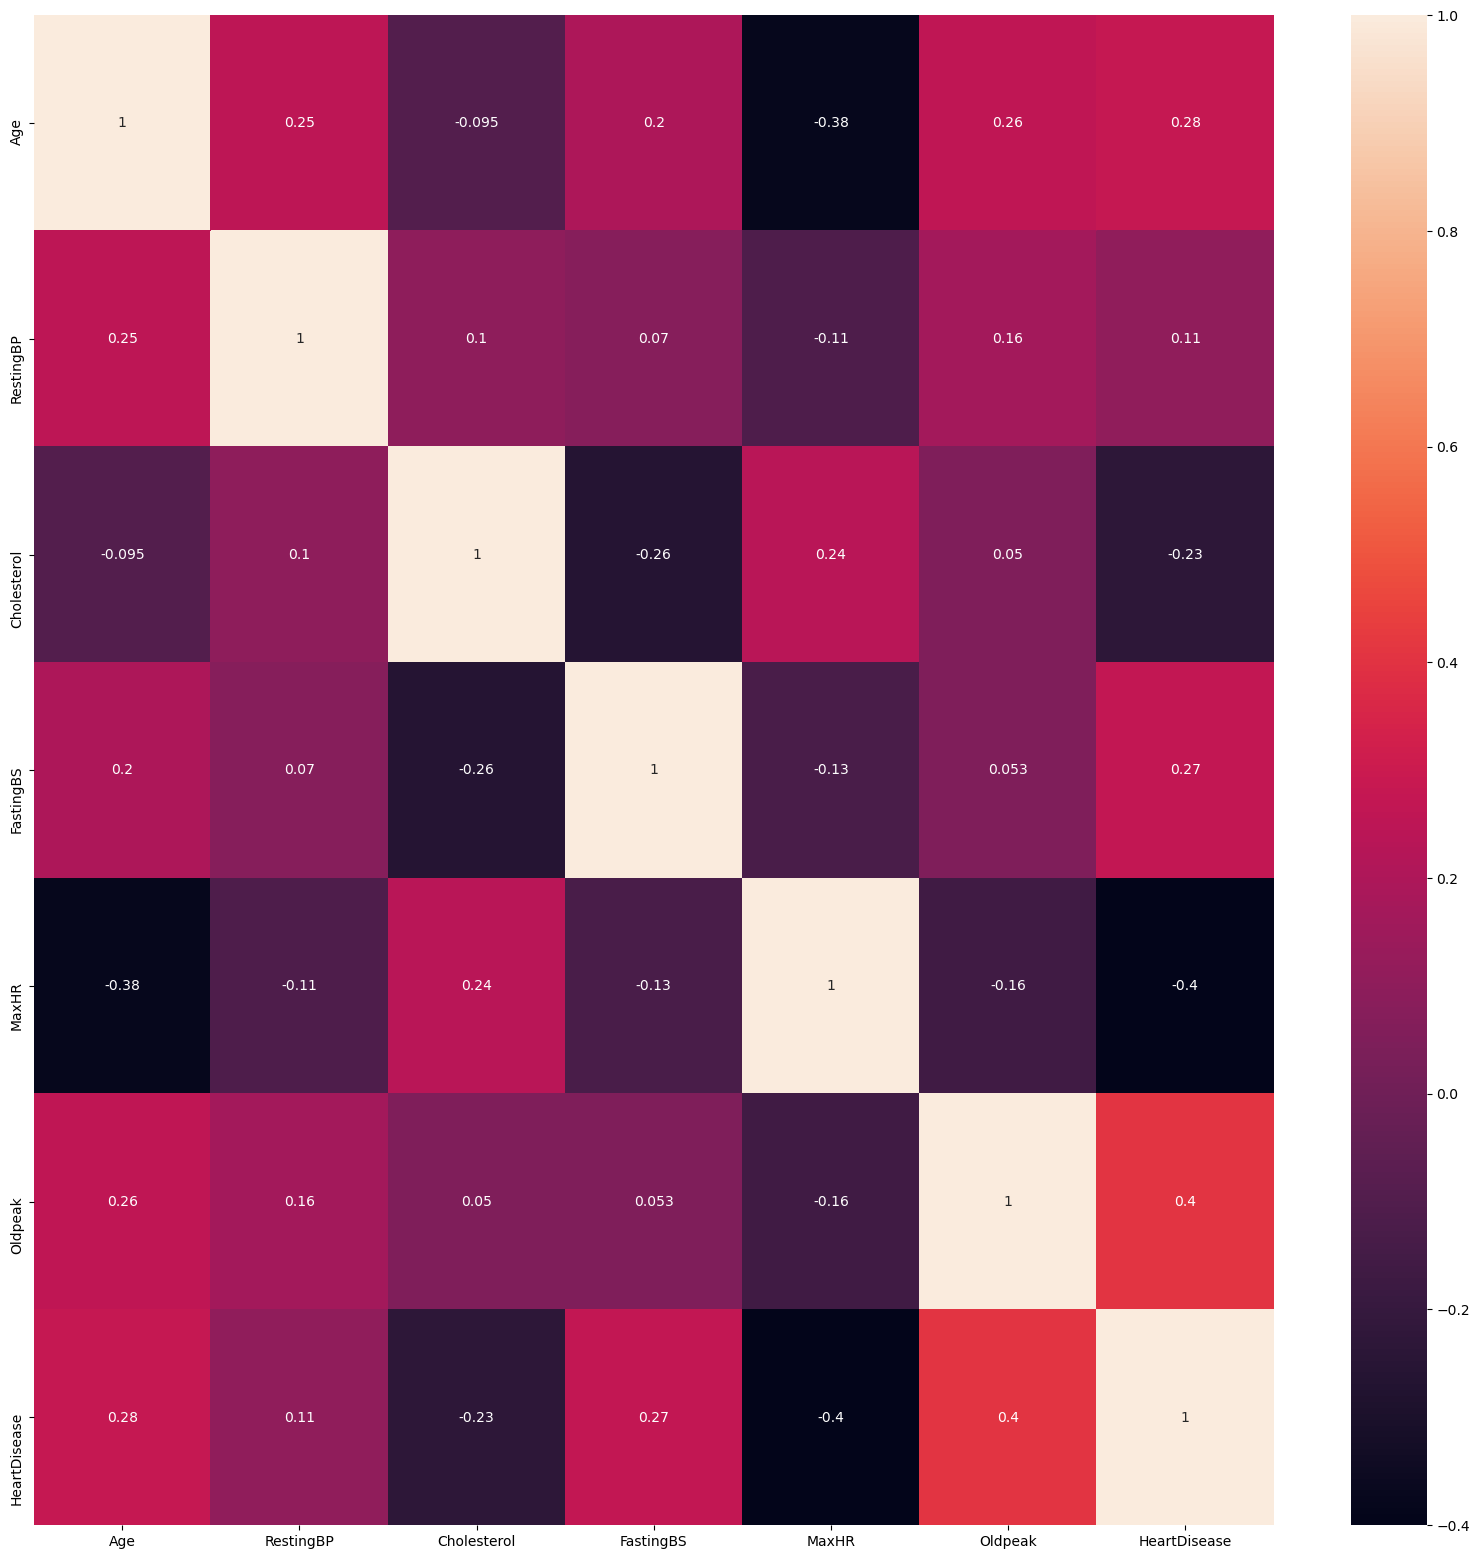

In [51]:
corr_heatmap = hearts.corr()
plt.figure(figsize=(20, 20), dpi=100)
sns.heatmap(corr_heatmap, annot=corr_heatmap)

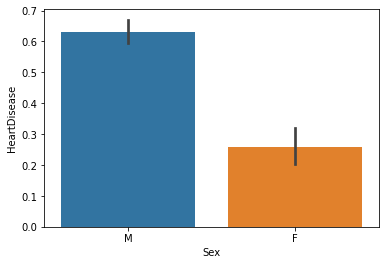

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

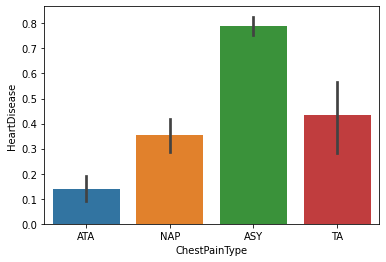

In [52]:
sns.barplot(x='Sex', y='HeartDisease', data=hearts)
plt.show()
sns.barplot(x='ChestPainType', y='HeartDisease', data=hearts)

In [53]:
categorical = hearts.dtypes == 'object'
categorical = categorical[categorical].index
categorical

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [54]:
hearts = pd.get_dummies(hearts)
hearts

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [55]:
hearts.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.540305,...,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.498645,...,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


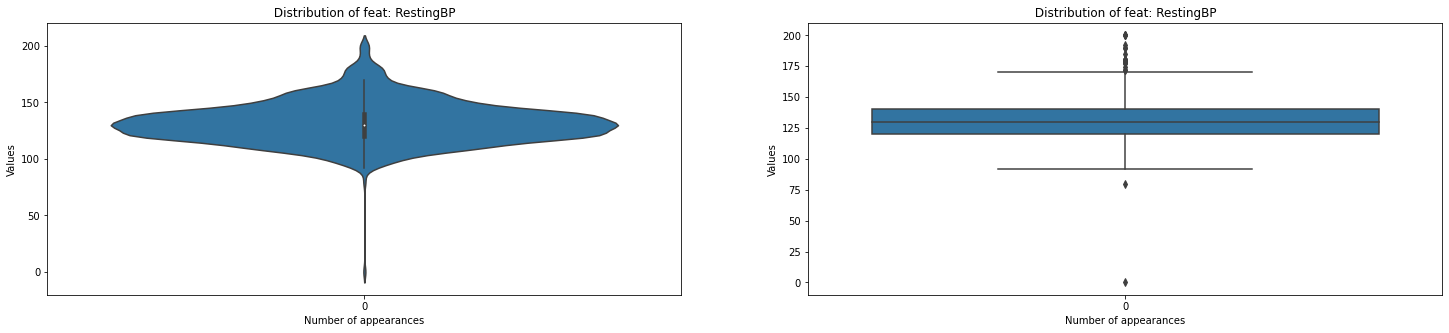

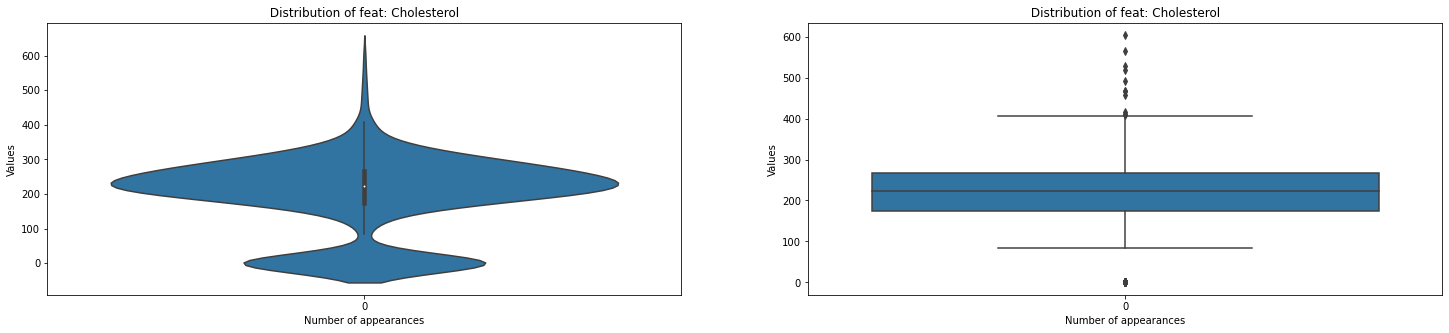

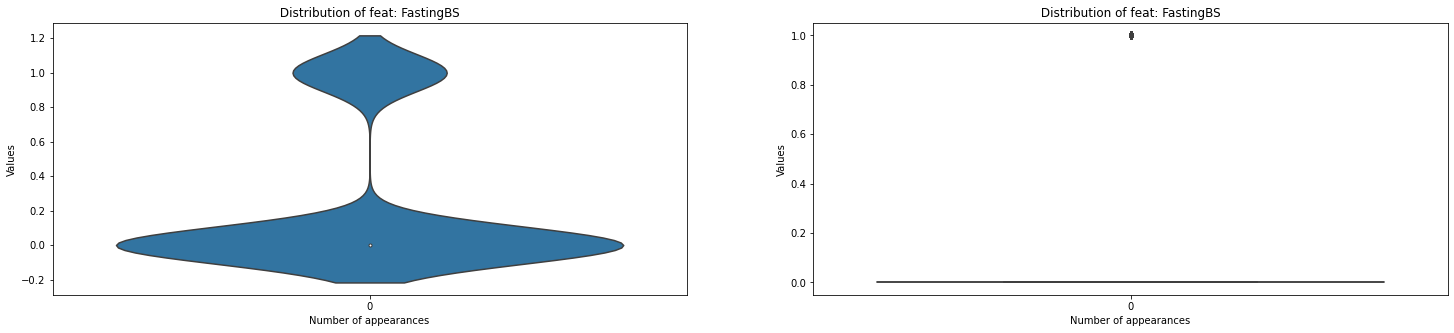

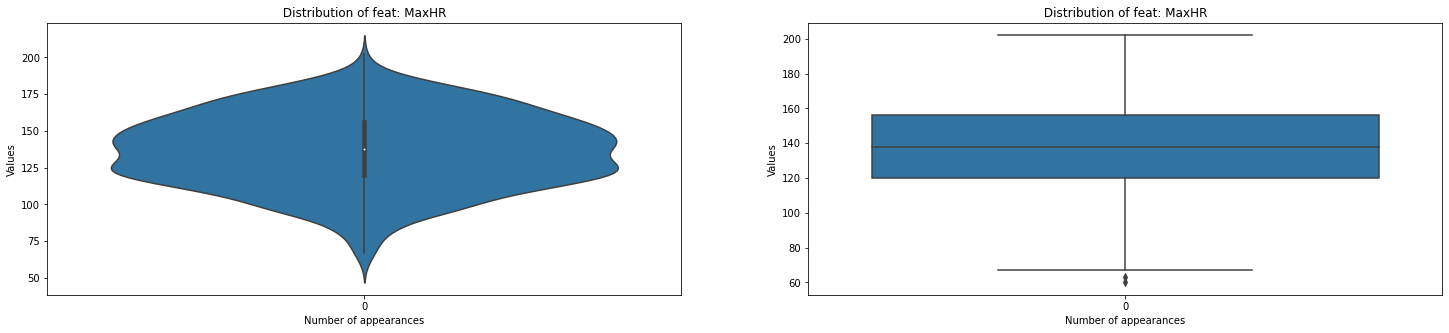

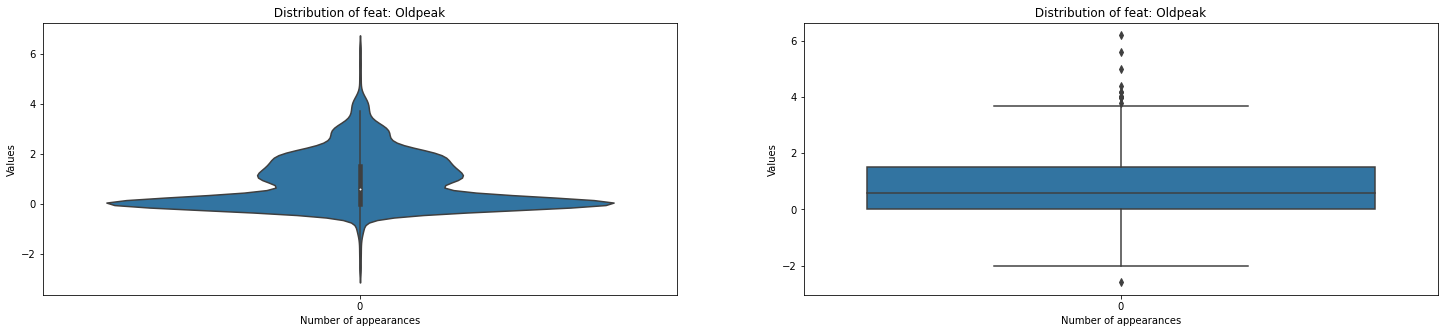

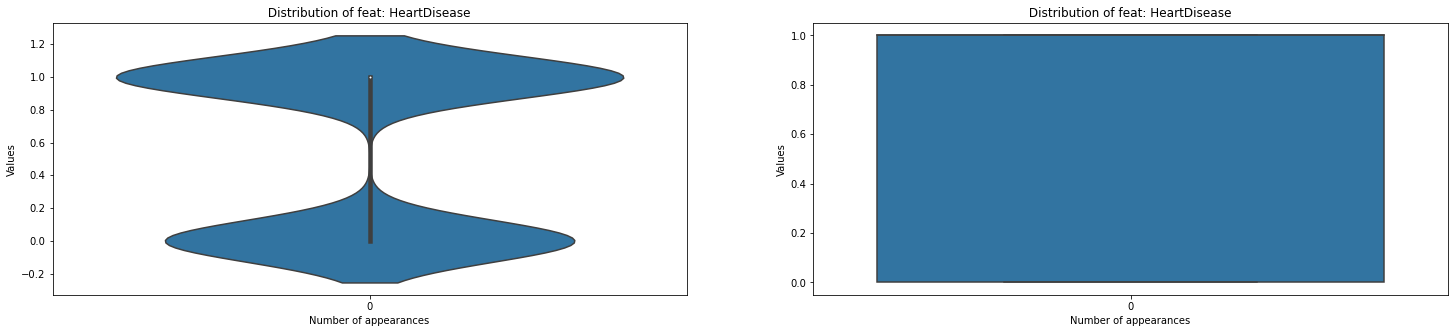

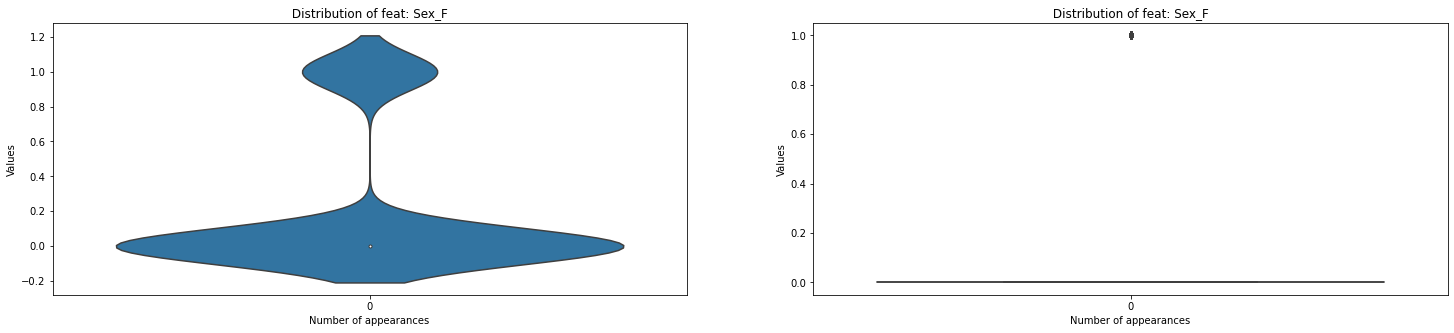

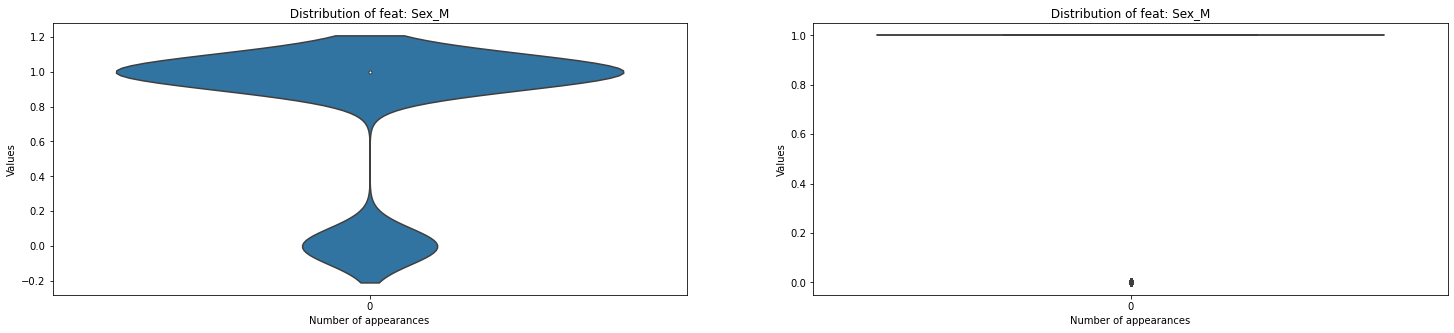

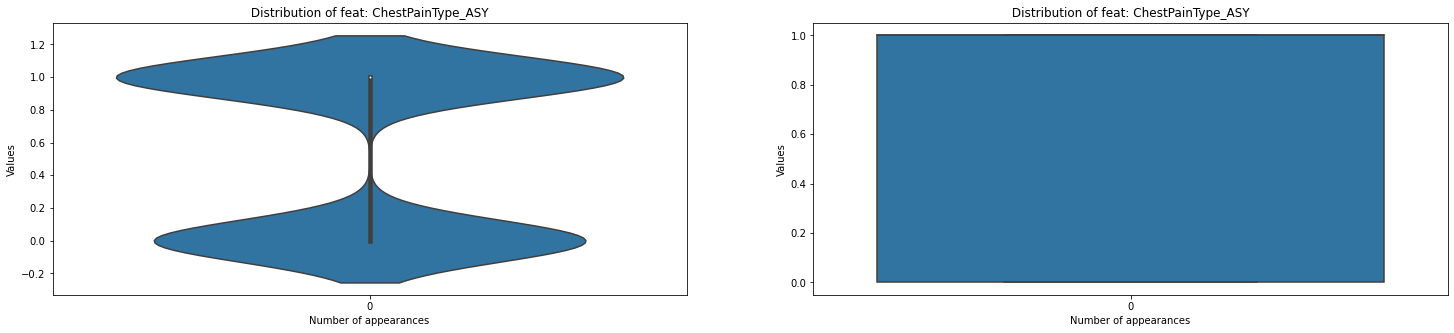

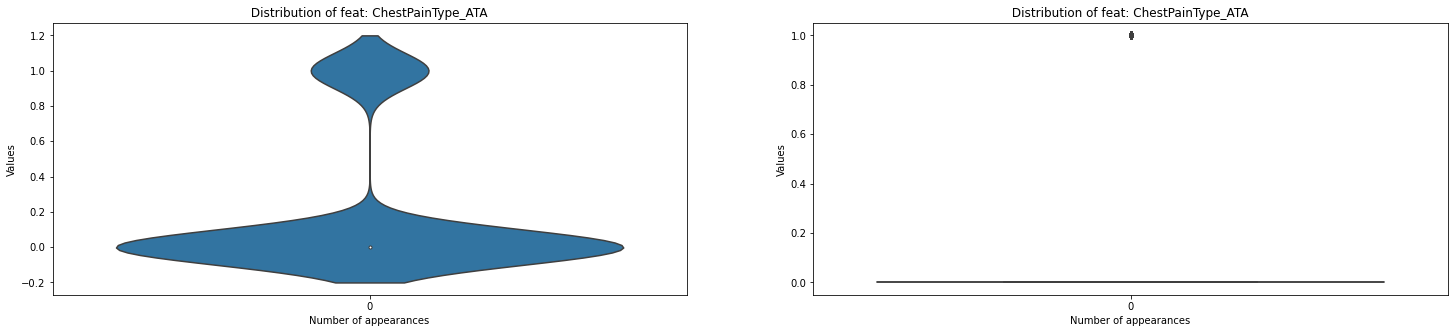

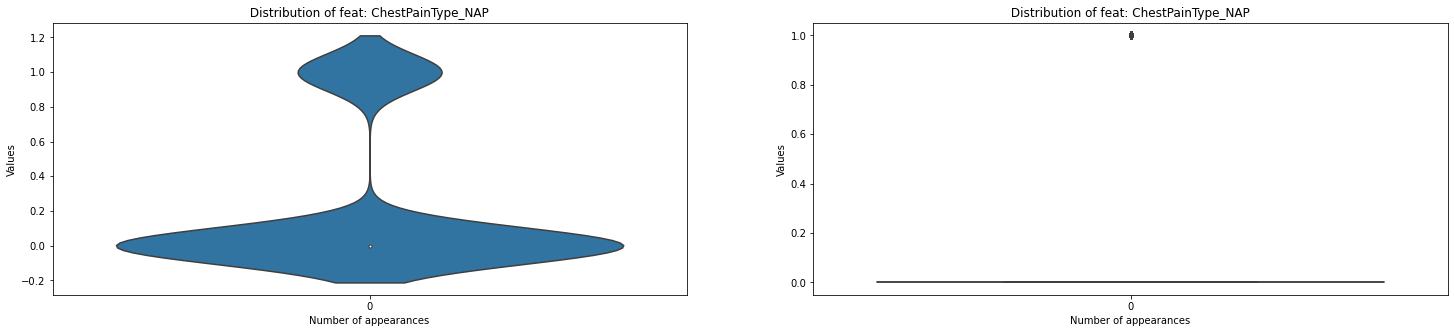

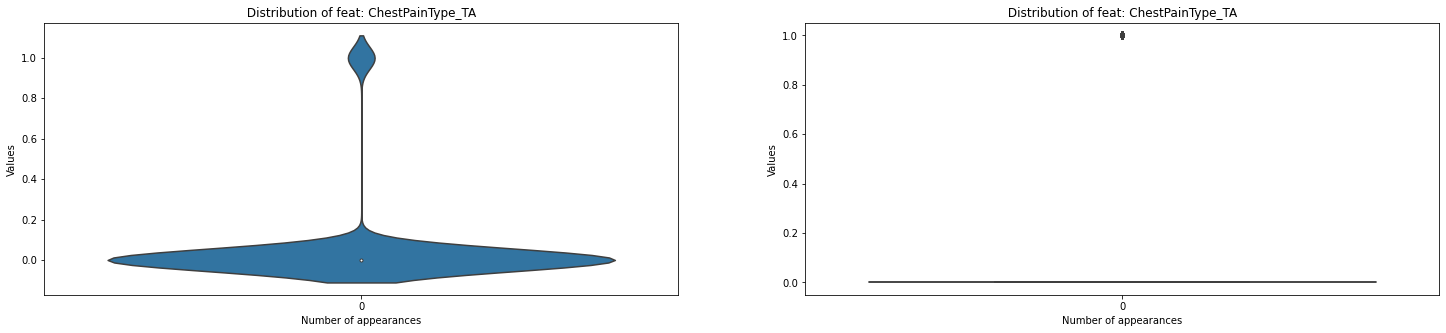

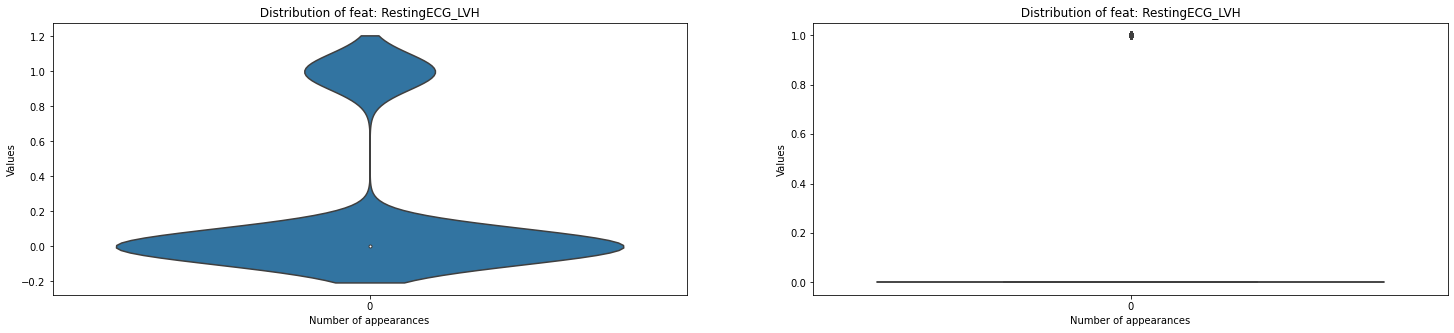

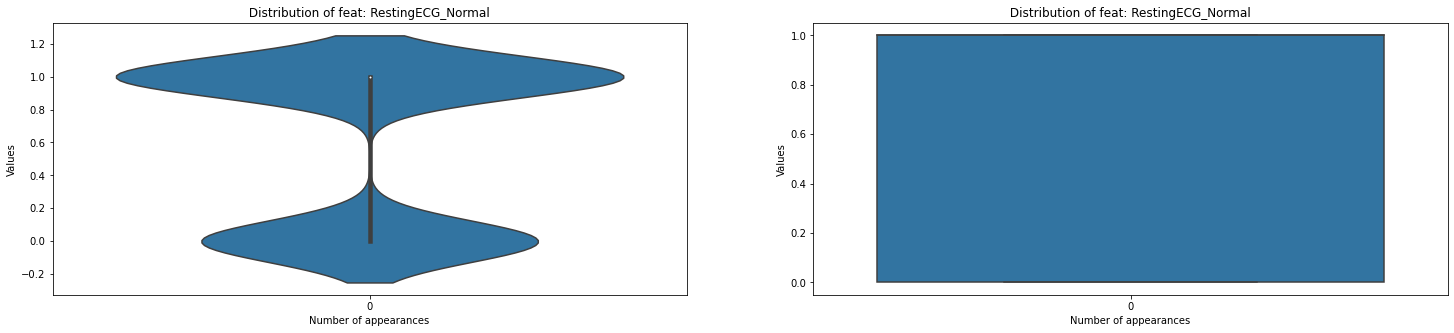

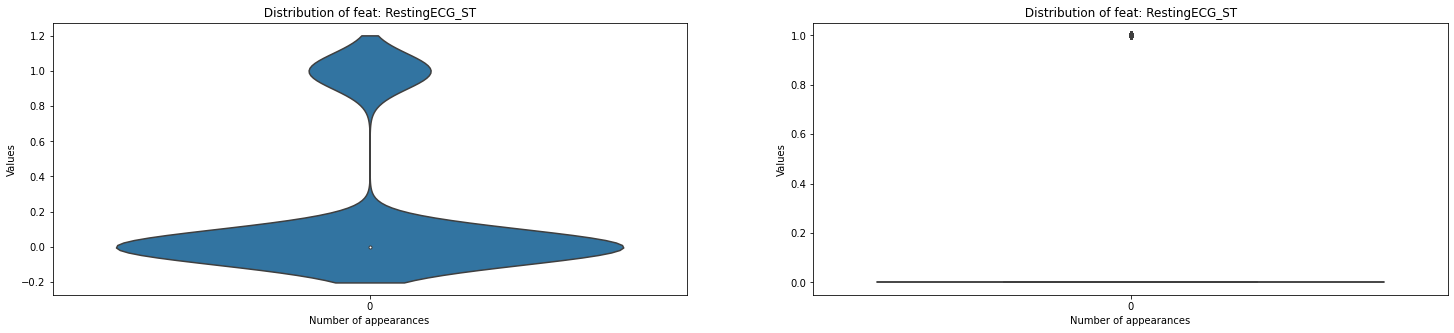

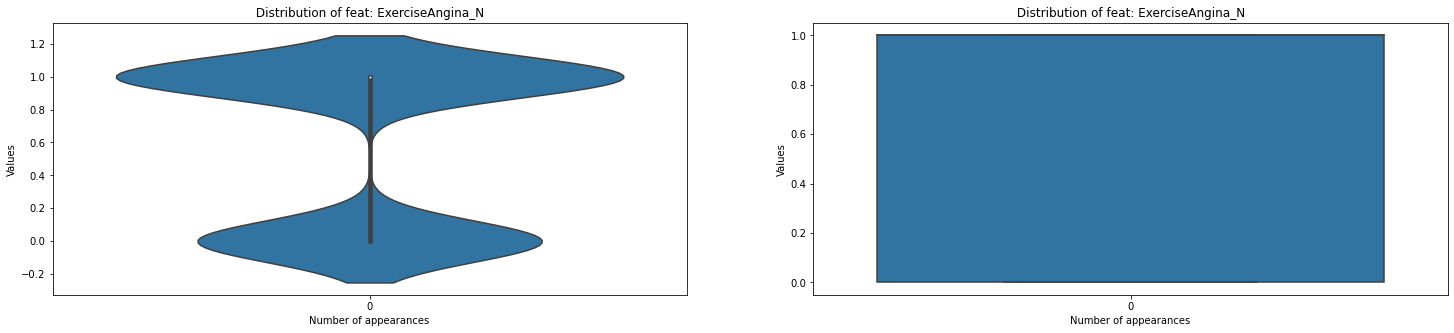

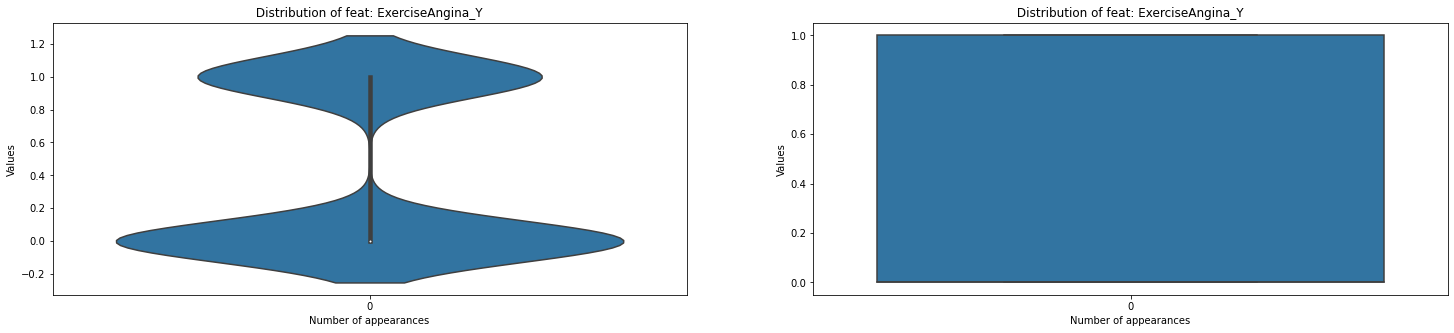

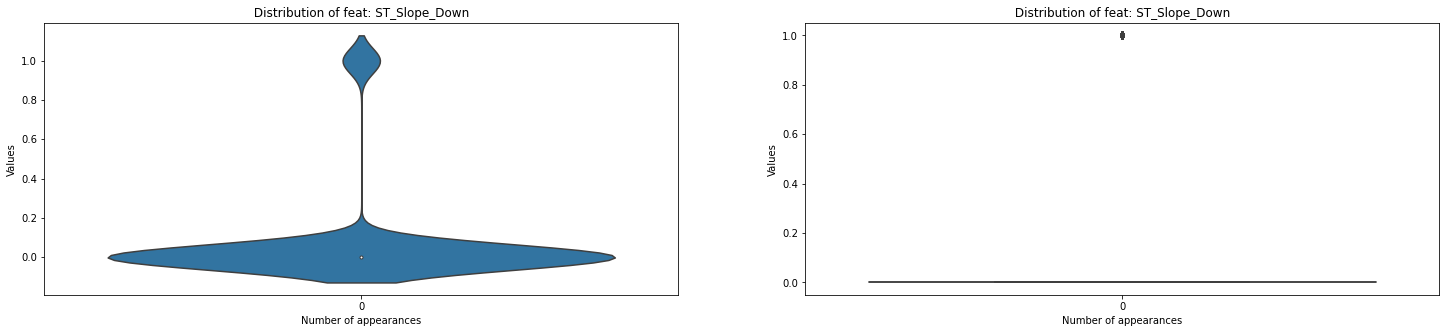

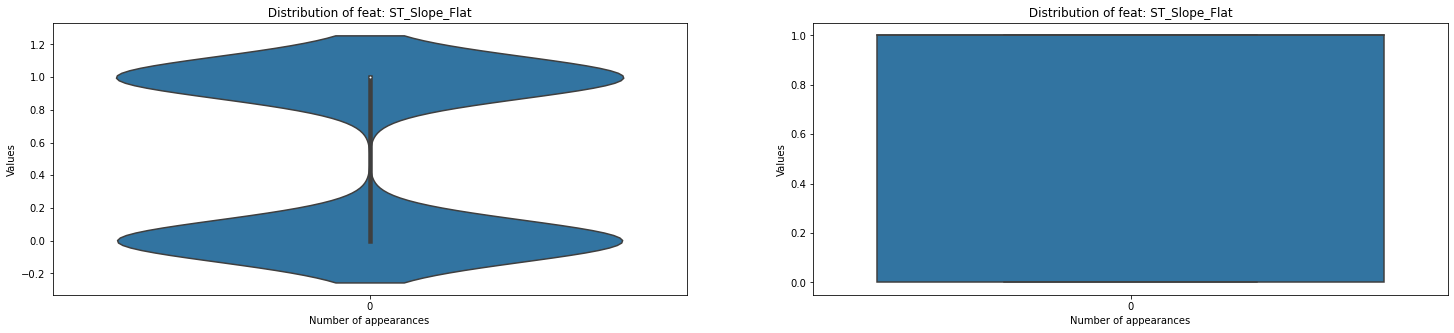

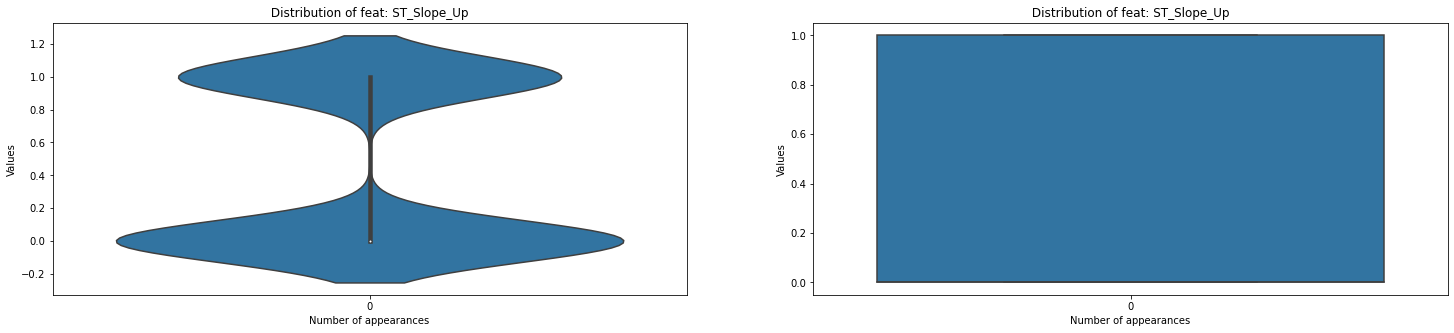

In [56]:
def sub_and_violin_plots(dataset):
    for feat in dataset.columns[1:].tolist():
        plt.figure(figsize=(25, 5))
        plt.subplot(1, 2, 1)
        ax = sns.violinplot(data=dataset[feat])
        ax.set_title(f" Distribution of feat: {feat} ")
        ax.set_xlabel("Number of appearances")
        ax.set_ylabel("Values")
        plt.subplot(1, 2, 2)
        bx = sns.boxplot(data=dataset[feat])
        bx.set_title(f" Distribution of feat: {feat} ")
        bx.set_xlabel("Number of appearances")
        bx.set_ylabel("Values")
        plt.show()


sub_and_violin_plots(hearts)

In [57]:
q1 = hearts.quantile(0.25)
q3 = hearts.quantile(0.75)
IQR = q3 - q1
IQR

Age                  13.00
RestingBP            20.00
Cholesterol          93.75
FastingBS             0.00
MaxHR                36.00
Oldpeak               1.50
HeartDisease          1.00
Sex_F                 0.00
Sex_M                 0.00
ChestPainType_ASY     1.00
ChestPainType_ATA     0.00
ChestPainType_NAP     0.00
ChestPainType_TA      0.00
RestingECG_LVH        0.00
RestingECG_Normal     1.00
RestingECG_ST         0.00
ExerciseAngina_N      1.00
ExerciseAngina_Y      1.00
ST_Slope_Down         0.00
ST_Slope_Flat         1.00
ST_Slope_Up           1.00
dtype: float64

Splitting data

In [58]:
X = hearts.drop(['HeartDisease'], axis=1)
y = hearts['HeartDisease']

<AxesSubplot:>

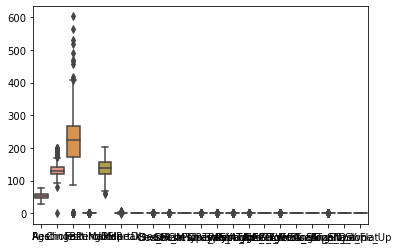

In [59]:
sns.boxplot(data=hearts)

In [60]:
for i in X.columns:
    X[str(i)] = np.where(X[str(i)] > X[str(i)].quantile(0.95), X[str(i)].quantile(0.95),
                              X[str(i)])

<AxesSubplot:>

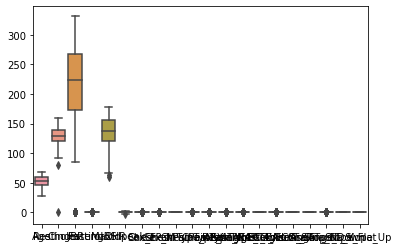

In [62]:
sns.boxplot(data=X)

In [63]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X

array([[-1.46516158,  0.50707808,  0.89464018, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [-0.47641985,  1.70944843, -0.15341082, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.79474215, -0.09410709,  0.8369493 , ..., -0.27144836,
        -1.00218103,  1.15067399],
       ...,
       [ 0.40246168, -0.09410709, -0.62455301, ..., -0.27144836,
         0.99782372, -0.86905588],
       [ 0.40246168, -0.09410709,  0.3850374 , ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.68488196,  0.38684105, -0.20148655, ..., -0.27144836,
        -1.00218103,  1.15067399]])

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Training model

Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
print(f'accuracy = {round((classifier.score(X_test,y_test))*100,2)}%')

accuracy = 82.61%


Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print(f'accuracy = {round((classifier.score(X_test,y_test))*100,2)}%')

accuracy = 78.8%


Random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(n_estimators=80 )
classifier.fit(X_train,y_train)
print(f'accuracy = {round((classifier.score(X_test,y_test))*100,2)}%')

accuracy = 86.41%


SVC

In [111]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', gamma=0.1)
classifier.fit(X_train,y_train)
print(f'accuracy = {round((classifier.score(X_test,y_test))*100,2)}%')

accuracy = 85.87%


Gradient boost

In [139]:
from sklearn.ensemble import GradientBoostingClassifier


GBC = GradientBoostingClassifier(n_estimators=10,
                                             max_depth=5,
                                             learning_rate=0.4)
GBC.fit(X_train,y_train)
print(f'accuracy = {round((GBC.score(X_test,y_test))*100,2)}%')


accuracy = 86.96%
